<a href="https://colab.research.google.com/github/Anup-Sarkar-DD/GoogleColab_repo/blob/main/stockpred_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os


In [8]:
df = pd.read_csv('/content/Tesla_Nasdaq_Prediction.csv')

In [9]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,4/8/2022,1025.49,18337900,1043.21,1048.44,1022.44
1,4/7/2022,1057.26,26482350,1052.39,1076.59,1021.54
2,4/6/2022,1045.76,29782850,1073.47,1079.00,1027.70
3,4/5/2022,1091.26,26691670,1136.30,1152.87,1087.30
4,4/4/2022,1145.45,27392570,1089.38,1149.91,1072.53


In [10]:
x = df.iloc[:,2:]

In [11]:
y = df['Close/Last']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2 , random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:

x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1]) #reshaped with time step 1 example (samples, time step , features )
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

In [16]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.transform(y_test.reshape(-1,1))

In [17]:
from keras.models import Sequential
from keras.layers import Dense , SimpleRNN , Dropout

In [18]:
model = Sequential()
model.add(SimpleRNN(256,input_shape = (x_train.shape[1],x_train.shape[2]),return_sequences = True))
model.add(Dropout(0.20))
model.add(SimpleRNN(128,return_sequences = True))
model.add(Dropout(0.20))
model.add(SimpleRNN(64,return_sequences = True))
model.add(Dropout(0.20))
model.add(Dense(1))



In [19]:
#compile the model
model.compile(loss = 'mse', optimizer='adam', metrics=['accuracy'])

summary = model.summary()

summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 1, 256)         │        66,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 1, 128)         │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 1, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 1)           │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,513 (502.00 KB)

 Trainable params: 128,513 (502.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.0000e+00 - loss: 0.1546 - val_accuracy: 0.0000e+00 - val_loss: 0.0065
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0489 - val_accuracy: 0.0000e+00 - val_loss: 0.0074
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0412 - val_accuracy: 0.0000e+00 - val_loss: 0.0078
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0355 - val_accuracy: 0.0000e+00 - val_loss: 0.0028
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0260 - val_accuracy: 0.0000e+00 - val_loss: 0.0092
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0369 - val_accuracy: 0.0000e+00 - val_loss: 0.0063
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0323 - val_accuracy: 0.0000e+00 - val_loss: 0.0071
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy:

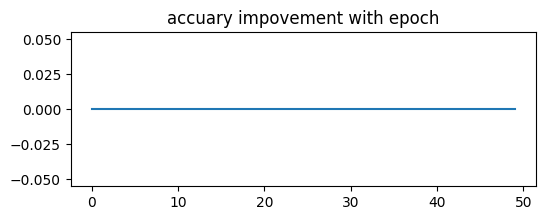

In [20]:
#train the model
cont1 = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

pd.DataFrame(cont1.history)['accuracy'].plot(figsize=(6,2))
plt.title("accuary impovement with epoch")
plt.show()

In [21]:
y_pred = model.predict(x_test)

y_prediction = scaler.inverse_transform(y_pred.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


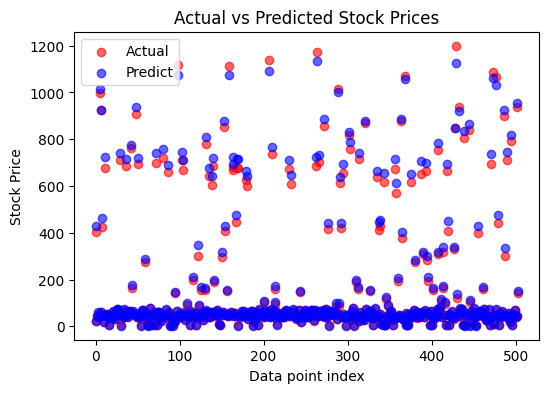

In [27]:
# prompt: use matplotlib to generate a graph other than plt.plot for actual  red color and predict blue

plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual', alpha=0.6)
plt.scatter(range(len(y_prediction)), y_prediction, color='blue', label='Predict', alpha=0.6)
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Data point index')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [29]:
mae = mean_absolute_error(y_test, y_prediction)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, y_prediction)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_prediction)
print("R-squared (R2) Score:", r2 *100)

Mean Absolute Error (MAE): 6.594946793582706
Mean Squared Error (MSE): 182.13978489959518
R-squared (R2) Score: 99.72137066580461


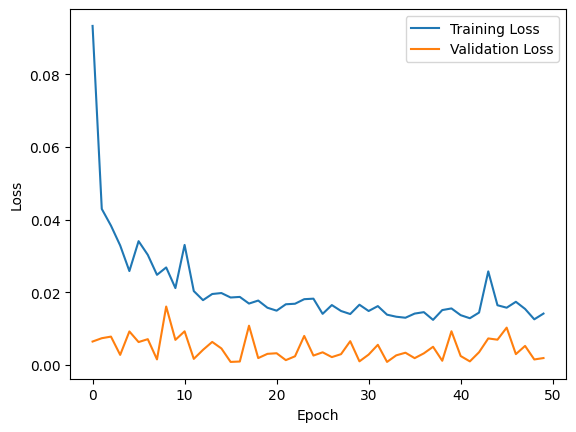

In [30]:
plt.plot(cont1.history['loss'], label='Training Loss')
plt.plot(cont1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()